# Figure 1: Behavior and Neural Discrimination plots

In [1]:
import scipy.stats as s
import numpy as np
import matplotlib.pyplot as plt
from os import path
import seaborn as sns
import pandas as pd

# Import project specific modules and enable automatic reloading
import sys
from pathlib import Path
import os
eraser_path = Path(os.getcwd()).parent
reinstatement_path = eraser_path.parent / 'FearReinstatement'
sys.path.append(str(eraser_path))
sys.path.append(str(reinstatement_path))
%load_ext autoreload
%autoreload 2

import eraser_reference as err
import er_plot_functions as er
from plotting import Fig, pretty_plot
import placefield_stability as pfs
import Placefields as pf
import discrimination as discr

In [2]:
# Fix for only certain xticks appearing...
def fix_xticks(ax, days_plot = [-2, -1, 4, 1, 2, 7]):
    days_str = [str(e) for e in days_plot]
    plt.sca(ax)
    plt.xticks(list(range(len(days_plot))), days_str)


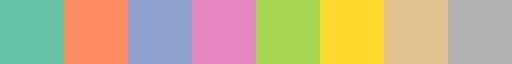

In [3]:
plt.get_cmap('Set2')

[8.5  4.75]


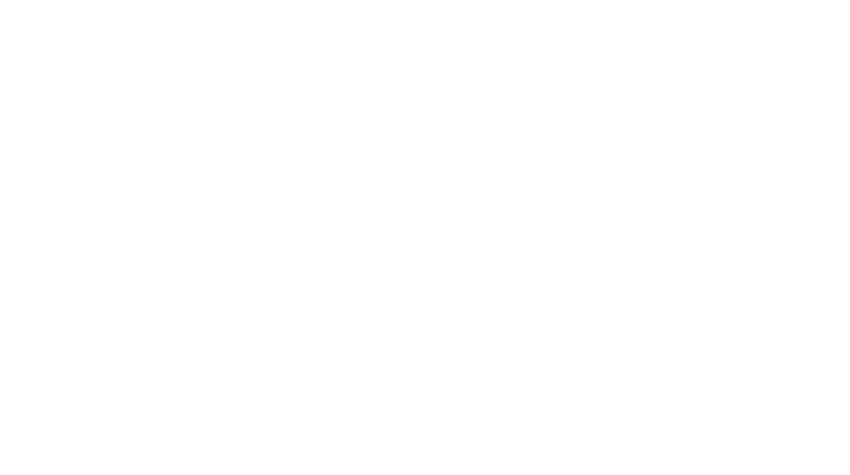

In [4]:
# Set up main figure plotting
%matplotlib ipympl
Fig1 = Fig(num=1, grid=(3, 4), size=(8.5, 4.75), fontsize=6)
print(Fig1.fig.get_size_inches())

[8.5  4.75]


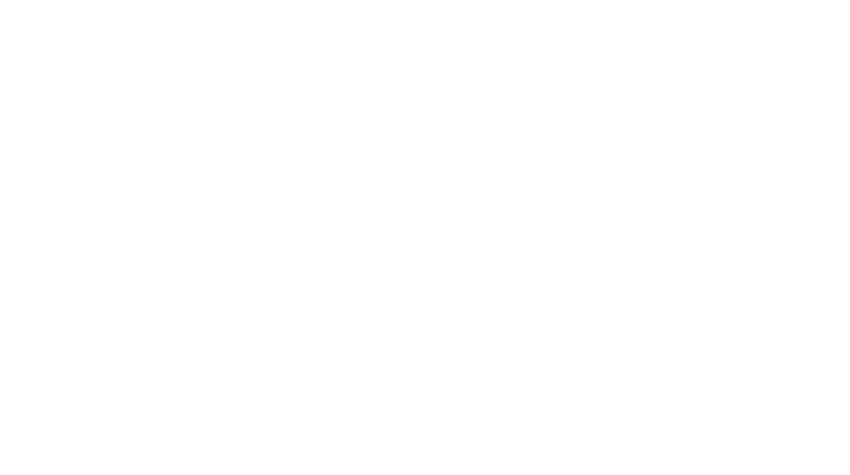

In [5]:
# Set up main figure stats companion plot
Fig1stats = Fig(num='Figure 1 stats', grid=(3, 4), size=(8.5, 4.75), fontsize=6)
print(Fig1stats.fig.get_size_inches())

In [6]:
# Designate Placeholders
aexp = Fig1.subplot(Fig1.gs[0, 0:2])
aexp.set_title('Exp. Outline Here')
aexp.axis('off')
aehisto = Fig1.subplot(345)
aehisto.set_title('Histology Here?')
aehisto.axis('off')
plt.draw()

## Start with behavioral plots

In [7]:
# Plot Control mice behavior
axc = Fig1.subplot(343)
figc, axc, fratio_cont = er.plot_all_freezing(err.control_mice_good, ax=axc, s=9, xoffset=0.1)
axc.set_ylim([-0.025, 0.80])
axc.set_title('Control')
fix_xticks(axc)
axc.set_xlabel('')
axc.set_xticklabels('')

/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble6/20180421_1_openfield: nbadpts = 63 max_in_a_row = 38
['Unknown file missing and/or IndexError for Marble06 Open 7']
Freezing left as NaN for this session
['Unknown file missing and/or IndexError for Marble06 Shock 7']
Freezing left as NaN for this session
['Unknown file missing and/or IndexError for Marble14 Open 4']
Freezing left as NaN for this session
['Unknown file missing and/or IndexError for Marble14 Open 1']
Freezing left as NaN for this session
['Unknown file missing and/or IndexError for Marble14 Open 2']
Freezing left as NaN for this session
['Unknown file missing and/or IndexError for Marble14 Open 7']
Freezing left as NaN for this session
/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble24/20181126_1_openfield: nbadpts = 18 max_in_a_row = 3
/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble24/20181127_1_openfield: nbadpts = 10 max_in_a_row = 4


[Text(0, 0, ''),
 Text(1, 0, ''),
 Text(2, 0, ''),
 Text(3, 0, ''),
 Text(4, 0, ''),
 Text(5, 0, '')]

In [8]:
# Increase in arena-specific freezing from days -2/-1 to days 1/2 is significant for controls
tstatc, ptc = s.ttest_ind((fratio_cont[1, 0:2, :] - fratio_cont[0, 0:2, :]).reshape(-1),
                           (fratio_cont[1, 3:5, :] - fratio_cont[0, 3:5, :]).reshape(-1), nan_policy='omit')
print(ptc/2)
print(tstatc)

astatsc = Fig1stats.subplot(343)
astatsc.text(0.1, 0.7, 'Control Mice')
astatsc.text(0.1, 0.6, 'un-paired one-way t-test days -2/-1 to days 1/2', fontdict=None)
astatsc.text(0.1, 0.5, f'p={ptc/2:0.3g}')
astatsc.text(0.1, 0.4, f'tstat={tstatc:0.3g}')
astatsc.axis('off')

0.025104577549869396
-2.046407579787083


(0.0, 1.0, 0.0, 1.0)

In [9]:
# Plot ANI mice behavior
axa = Fig1.subplot(344)
figa, axa, fratio_ani = er.plot_all_freezing(err.ani_mice_good, ax=axa, s=9, xoffset=0.1)
axa.set_ylim([-0.025, 0.80])
fix_xticks(axa)
axa.set_xlabel('')
axa.set_xticklabels('')
axa.set_ylabel('')
axa.set_title('Anisomycin')

/Users/nkinsky/Documents/BU/Working/Eraser/Anisomycin Group/Marble25/20181203_1_openfield: nbadpts = 9 max_in_a_row = 6


Text(0.5, 1.0, 'Anisomycin')

In [10]:
# Non-significant increase in freezing for ANI mice from before to after (days -2/-1 to days 1/2)
astatsa = Fig1stats.subplot(344)
tstata, pta = s.ttest_ind((fratio_ani[1, 0:2, :] - fratio_ani[0, 0:2, :]).reshape(-1),
                           (fratio_ani[1, 3:5, :] - fratio_ani[0, 3:5, :]).reshape(-1), nan_policy='omit')
print(pta/2)
print(tstata)

astatsa.text(0.1, 0.7, 'ANI Mice')
astatsa.text(0.1, 0.6, 'un-paired one-way t-test days -2/-1 to days 1/2', fontdict=None)
astatsa.text(0.1, 0.5, f'p={pta/2:0.3g}')
astatsa.text(0.1, 0.4, f'tstat={tstata:0.3g}')
astatsa.axis('off')

0.11178530200553738
-1.2605402424159724


(0.0, 1.0, 0.0, 1.0)

In [11]:
# Calculate Discrimination Index (DI) ratios for day 1-2
learning_cutoff = -0.35

# Controls
DI_aft = ((fratio_cont[0, 3:5, :] - fratio_cont[1, 3:5, :]).reshape(-1))/((fratio_cont[0, 3:5, :] + 
                                                                           fratio_cont[1, 3:5, :]).reshape(-1))
# ANI - not used due to this being a poor metric if animals don't freeze a lot, only good for specifying
# how specific a memory is in mice that actually freeze.  See next block.
DI_aft_ani = ((fratio_ani[0, 3:5, :] - fratio_ani[1, 3:5, :]).reshape(-1))/((fratio_ani[0, 3:5, :] + 
                                                                           fratio_ani[1, 3:5, :]).reshape(-1))

In [12]:
# Here are all the DIs for controls averaged across days 1 and 2 - note that this metric can distort things as 
# animal 3, for example, freezes very little in either arena and so is a non-learner even though he has a lower DI
# value, while animal 1 and animal 3 freeze in both arenas and are also a non-learner.
DI_aft.reshape(fratio_cont[1, 3:5, :].shape).mean(axis=0)

array([-0.10379693, -0.39033887, -0.21642609, -0.59563518,         nan,
       -0.71391564, -0.36638349, -0.06170731])

In [13]:
from itertools import compress
# Print out learners vs. non-learners
learn_bool = DI_aft.reshape(fratio_cont[1, 3:5, :].shape).mean(axis=0) < learning_cutoff
# learners = err.control_mice_good[learn_bool]
learners = list(compress(err.control_mice_good, learn_bool))
nonlearners = list(compress(err.control_mice_good, ~learn_bool))
print('Learners')
print(learners)
# Check that matches what's in your code
print(err.learners)

# Note that Marble 14 can't really be designated either way since his open field behavioral data was corrupted on
# those days. However, he would likely be a non-learner since he barely freezes in the shock arena after shock.
print('Non-Learners')
print(nonlearners)
# Check that matches what's in your code
print(err.nonlearners)

Learners
['Marble07', 'Marble12', 'Marble24', 'Marble27']
['Marble07', 'Marble12', 'Marble24', 'Marble27']
Non-Learners
['Marble06', 'Marble11', 'Marble14', 'Marble29']
['Marble06', 'Marble11', 'Marble29']


In [14]:
# Plot non-learners and learners
axlrn = Fig1.subplot(347)
_, axlrn, fratio_lrn = er.plot_all_freezing(err.learners, ax=axlrn, s=9, xoffset=0.1)
axlrn.set_title('Learners')
axlrn.set_ylim([-0.025, 0.80])

axnlrn = Fig1.subplot(348)
_, axnlrn, fratio_nl = er.plot_all_freezing(err.nonlearners, ax=axnlrn, s=9, xoffset=0.1)
axnlrn.set_ylim([-0.025, 0.80])
axnlrn.set_ylabel('')
axnlrn.set_title('Non-Learners')

/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble24/20181126_1_openfield: nbadpts = 18 max_in_a_row = 3
/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble24/20181127_1_openfield: nbadpts = 10 max_in_a_row = 4
/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble6/20180421_1_openfield: nbadpts = 63 max_in_a_row = 38
['Unknown file missing and/or IndexError for Marble06 Open 7']
Freezing left as NaN for this session
['Unknown file missing and/or IndexError for Marble06 Shock 7']
Freezing left as NaN for this session


Text(0.5, 1.0, 'Non-Learners')

In [15]:
# Highly sig freezing for Learners
tstatlrn, ptlrn = s.ttest_ind((fratio_lrn[1, 0:2, :] - fratio_lrn[0, 0:2, :]).reshape(-1),
                           (fratio_lrn[1, 3:5, :] - fratio_lrn[0, 3:5, :]).reshape(-1), nan_policy='omit')
print(ptlrn)
print(tstatlrn)
astatslrn = Fig1stats.subplot(347)
astatslrn.text(0.1, 0.7, 'Learners')
astatslrn.text(0.1, 0.6, 'un-paired one-way t-test days -2/-1 to days 1/2', fontdict=None)
astatslrn.text(0.1, 0.5, f'p={ptlrn/2:0.3g}')
astatslrn.text(0.1, 0.4, f'tstat={tstatlrn:0.3g}')
astatslrn.axis('off')

2.604580452861292e-05
-6.1303015328719015


(0.0, 1.0, 0.0, 1.0)

In [16]:
# Non-sig freezing for NonLearners
tstatnl, ptnl = s.ttest_ind((fratio_nl[1, 0:2, :] - fratio_nl[0, 0:2, :]).reshape(-1),
                           (fratio_nl[1, 3:5, :] - fratio_nl[0, 3:5, :]).reshape(-1), nan_policy='omit')

print(ptnl)
print(tstatnl)
astatsnl = Fig1stats.subplot(348)
astatsnl.text(0.1, 0.7, 'Non-Learners')
astatsnl.text(0.1, 0.6, 'un-paired one-way t-test days -2/-1 to days 1/2', fontdict=None)
astatsnl.text(0.1, 0.5, f'p={ptnl/2:0.3g}')
astatsnl.text(0.1, 0.4, f'tstat={tstatnl:0.3g}')
astatsnl.axis('off')

0.34211175634596924
0.9973584695991825


(0.0, 1.0, 0.0, 1.0)

In [17]:
## Run stats - group of interests are Learners vs. ANI, other comparisons included for completeness.
pval_bwgroup_1sidedt_specific = np.ones(6)*np.nan
pval_ani_nl_1sidedt_specific = np.ones(6)*np.nan
pval_lrn_nl_1sidedt_specific = np.ones(6)*np.nan
pval_bwgroup_1sidedt_shockonly = np.ones(6)*np.nan # bw lrn and ani directly, no accounting for specificity
for id in range(0, 6):
    
    # ANI vs Learners
    stats, pval = s.ttest_ind(fratio_ani[1, id, :].reshape(-1) - fratio_ani[0, id, :].reshape(-1),
                              fratio_lrn[1, id, :].reshape(-1) - fratio_lrn[0, id, :].reshape(-1),
                              nan_policy='omit')
    
    # ANI vs Non-Learners
    stats_nla, pval_nla = s.ttest_ind(fratio_ani[1, id, :].reshape(-1) - fratio_ani[0, id, :].reshape(-1),
                              fratio_nl[1, id, :].reshape(-1) - fratio_nl[0, id, :].reshape(-1),
                              nan_policy='omit')
    
    # Learners vs Non-Learners
    stats_lrnnl, pval_lrnnl = s.ttest_ind(fratio_nl[1, id, :].reshape(-1) - fratio_nl[0, id, :].reshape(-1),
                              fratio_lrn[1, id, :].reshape(-1) - fratio_lrn[0, id, :].reshape(-1),
                              nan_policy='omit')
    

    statss, pvals = s.ttest_ind(fratio_ani[1, id, :], fratio_lrn[1, id, :], nan_policy='omit')
    pval_bwgroup_1sidedt_shockonly[id] = pvals/2

    # Hypothesis is that ani freezing is less than control guys relative to neutral arena
    # So if ani guys mean freezing relative to shock is < 0 (i.e. if stats < 0), divide the pvalue by 2
    # If it's actually larger, then test fails and p = 1-pval/2
    if stats < 0:
        pval_bwgroup_1sidedt_specific[id] = pval/2
    elif stats > 0:
        pval_bwgroup_1sidedt_specific[id] = 1 - pval/2
        
    if stats_nla < 0:
        pval_ani_nl_1sidedt_specific[id] = pval_nla/2
    elif stats_nla > 0:
        pval_ani_nl_1sidedt_specific[id] = 1 - pval_nla/2
       
    if stats_lrnnl < 0:
        pval_lrn_nl_1sidedt_specific [id] = pval_lrnnl/2
    elif stats_lrnnl > 0:
        pval_lrn_nl_1sidedt_specific [id] = 1 - pval_lrnnl/2


In [18]:
# Add between group stats to stats figure
abw_grp_stats = Fig1stats.subplot(Fig1stats.gs[0, 0:2])
days = [-2, -1, 4, 1, 2, 7]
abw_grp_stats.text(0.1, 0.8, '1-sided t-test bw groups')
abw_grp_stats.text(0.1, 0.7, 'Learners v ANI shock arena only')
abw_grp_stats.text(0.1, 0.6, [f'{day}: p={p:0.3g}' for day, p in zip(days, pval_bwgroup_1sidedt_shockonly)])

abw_grp_stats.text(0.1, 0.5, 'ANI vs Non-learners shock-open freezing')
abw_grp_stats.text(0.1, 0.4, [f'{day}: p={p:0.3g}' for day, p in zip(days, pval_ani_nl_1sidedt_specific)])

abw_grp_stats.text(0.1, 0.3, 'Non-Learners vs. Learners')
abw_grp_stats.text(0.1, 0.2, [f'{day}: p={p:0.3g}' for day, p in zip(days, pval_lrn_nl_1sidedt_specific)])

Text(0.1, 0.2, "['-2: p=0.894', '-1: p=0.747', '4: p=0.22', '1: p=0.00391', '2: p=0.0267', '7: p=0.657']")

## DI ratio plots by group

In [19]:
# Calculate DI ratio for all groups
DI_lrn = (fratio_lrn[0] - fratio_lrn[1])/(fratio_lrn[0] + fratio_lrn[1])
DI_nl = (fratio_nl[0] - fratio_nl[1])/(fratio_nl[0] + fratio_nl[1])
DI_a = (fratio_ani[0] - fratio_ani[1])/(fratio_ani[0] + fratio_ani[1])

# Dump into nice dataframe
DI_all = []
days_all = []
grp_all = []
for DI, grp in zip([DI_lrn, DI_nl, DI_a], ['Learners', 'Non-Learners', 'ANI']):
    DI_all.extend(DI.reshape(-1))
    grp_all.extend([grp for _ in DI.reshape(-1)])
    days_all.extend(np.matlib.repmat(days, DI.shape[1], 1).T.reshape(-1))

DIdf = pd.DataFrame({'DI': DI_all, 'Day': days_all, 'Group': grp_all})

## NRK todo: make this a nice plot with Set2 colors and dump into the above figure.
Then dump in overlap ratios `pfs.get_overlap` and plot out same plot but for neural discrimination before (here) and after (here or supplemental) along with DIbeh vs. overlap and DIbeh vs DIneural

Make behavioral breakdown plots showing DI is different between Learners and Non-Learners/ANI

In [20]:
axDIaft = Fig1.subplot(346)
DIaft = DIdf[((DIdf['Day'] == 1) | (DIdf['Day'] == 2))]
sns.stripplot(x='Group', y='DI', data=DIaft, ax=axDIaft, cmap='Set2', size=3)
fix_xticks(axDIaft, ['Learners', 'Non-Learners', 'ANI'])
axDIaft.set_title('After: Days 1 and 2')
axDIaft.set_ylabel('$DI_{beh}$')

Text(0, 0.5, '$DI_{beh}$')

Run stats on this plot

In [21]:
tstat_aft_ln, p_aft_ln = s.ttest_ind(DIaft[DIaft.Group == 'Learners'].DI, DIaft[DIaft.Group == 'Non-Learners'].DI)
tstat_aft_la, p_aft_la = s.ttest_ind(DIaft[DIaft.Group == 'Learners'].DI, DIaft[DIaft.Group == 'ANI'].DI)
tstat_aft_na, p_aft_na = s.ttest_ind(DIaft[DIaft.Group == 'Non-Learners'].DI, DIaft[DIaft.Group == 'ANI'].DI)

axDIaft_stats = Fig1stats.subplot(346)
groups = ['L v NL', 'L v ANI', 'NL v ANI']
axDIaft_stats.text(0.1, 0.7, '1-sided t-test DIbehavior bw groups days 1 and 2')
ytext = 0.6
for grp, tstat, p in zip(groups, [tstat_aft_ln, tstat_aft_la, tstat_aft_na], [p_aft_ln, p_aft_la, p_aft_na]):
    puse = p/2 if tstat < 0 else 1 - p/2
    axDIaft_stats.text(0.1, ytext, f'{grp}: p={puse:0.3g} w/tstat={tstat:0.3g}')
    ytext -= 0.1

Get cell overlap between arenas for each day and dump into DI dataframe.

In [22]:
days = [-2, -1, 4, 1, 2, 7]
mice_grp = [err.learners, err.nonlearners, err.ani_mice_good]
overlaps_all = []
for mice in mice_grp:
    grp_overlaps = []
    for mouse in mice:
        mouse_overlaps = []
        for day in days:
            _, _, overlap, _, _ = pfs.get_overlap(mouse, 'Shock', day, 'Open', day)
            mouse_overlaps.append(overlap)
        grp_overlaps.append(mouse_overlaps)
    overlaps_all.append(np.asarray(grp_overlaps).T)

# Now build up in same way as above for consistency
olap_list = []
for olap, grp in zip(overlaps_all, ['Learners', 'Non-Learners', 'ANI']):
    olap_list.extend(olap.reshape(-1))
DIdf.insert(2, 'Cell Overlap', olap_list)

placefields_cm1_manlims_1000shuf.pkl not found, loading FinalOutput.mat which is slow


In [23]:
# Calculate neural discrimination index

days = [-2, -1, 4, 1, 2, 7]
mice_grp = [err.learners, err.nonlearners, err.ani_mice_good]
discr_all = []
for mice in mice_grp:
    grp_discr = []
    for mouse in mice:
        mouse_discr = []
        for day in days:
            DIneurons = discr.get_DI_scores(mouse, 'Open', day, 'Shock', day)
            mouse_discr.append(np.mean(np.abs(DIneurons)))
        grp_discr.append(mouse_discr)
    discr_all.append(np.asarray(grp_discr).T)

# Now build up in same way as above for consistency
DImean_list = []
for DImean, grp in zip(discr_all, ['Learners', 'Non-Learners', 'ANI']):
    DImean_list.extend(DImean.reshape(-1))
DIdf.insert(3, '|DI|mean', DImean_list)

In [24]:
DIdf

,DI,Day,Cell Overlap,|DI|mean,Group
0,0.136270,-2,0.413377,0.379145,Learners
1,-0.433829,-2,0.386935,0.333681,Learners
2,-0.207305,-2,0.267769,0.438071,Learners
3,-0.206123,-2,0.517056,0.319441,Learners
4,-0.180234,-1,0.377252,0.376256,Learners
...,...,...,...,...,...
67,-0.372626,7,0.192623,0.314473,ANI
68,0.046989,7,0.209486,0.362588,ANI
69,-0.156865,7,0.320000,0.340411,ANI
70,-0.279648,7,0.294922,0.391373,ANI


Plot DIneuron by group BEFORE shock

In [25]:
axDIbef = Fig1.subplot(Fig1.gs[2, 1])
DIbef = DIdf[((DIdf['Day'] == -2) | (DIdf['Day'] == -1))]
sns.stripplot(x='Group', y='|DI|mean', data=DIbef, ax=axDIbef, palette='Set2', size=3)
fix_xticks(axDIbef,['Learners', 'Non-Learners', 'ANI'])
axDIbef.set_title('Before: Days -2 and -1')
axDIbef.set_ylabel(r"$\overline{|DI_{neural}|}$")

Text(0, 0.5, '$\\overline{|DI_{neural}|}$')

In [26]:
axDIbef_stats = Fig1stats.subplot(Fig1stats.gs[2, 1])
statb_ln, pb_ln = s.ttest_ind(DIbef[DIbef.Group == 'Non-Learners']['|DI|mean'], 
                              DIbef[DIbef.Group == 'Learners']['|DI|mean'])
statb_an, pb_an = s.ttest_ind(DIbef[DIbef.Group == 'ANI']['|DI|mean'], 
                              DIbef[DIbef.Group == 'Non-Learners']['|DI|mean'])
statb_la, pb_la = s.ttest_ind(DIbef[DIbef.Group == 'ANI']['|DI|mean'],
                              DIbef[DIbef.Group == 'Learners']['|DI|mean'])

axDIbef_stats.text(0.1, 0.8, 'two-sided t-test abs(DIneural)_mean BEFORE shock days')
axDIbef_stats.text(0.1, 0.7, f'NL vs. L p={pb_ln:0.3g} w/tstat={statb_ln:0.3g}')
axDIbef_stats.text(0.1, 0.6, f'NL vs. ANI p={pb_an:0.3g} w/tstat={statb_an:0.3g}')
axDIbef_stats.text(0.1, 0.5, f'ANI vs. L p={pb_la:0.3g} w/tstat={statb_la:0.3g}')
print(pb_ln)
print(pb_an)
print(pb_la)

0.03011891596549444
0.05890575797380454
0.2933162083583539


## NRK todo: 
dump this and plot above into figure, plot lines over the below, dump stats into stats fig, then move onto same with on/off cells

In [27]:
axDIvDI = Fig1.subplot(Fig1.gs[2, 2])
DIaft = DIdf[((DIdf['Day'] == 1) | (DIdf['Day'] == 2) | (DIdf['Day'] == 7))]
sns.scatterplot(x='DI', y='|DI|mean', data=DIaft[DIaft.Group != 'ANI'], hue='Group', ax=axDIvDI,
                size=3, palette='Set2', legend=False)
axDIvDI.set_xlabel(r"$DI_{beh}$")
axDIvDI.set_ylabel(r"$\overline{|DI_{neural}|}$")

Text(0, 0.5, '$\\overline{|DI_{neural}|}$')

Get Stats and plot regression lines over actual plot

In [28]:
axDIvDIstats = Fig1stats.subplot(Fig1stats.gs[2, 2])
cmap_use = plt.get_cmap('Set2')

# Learners
corr_lrn, p_corr_lrn = s.spearmanr(DIaft[DIaft.Group == 'Learners']['DI'], 
                                   DIaft[DIaft.Group == 'Learners']['|DI|mean'])
lrn_lreg = s.linregress(DIaft[DIaft.Group == 'Learners']['DI'], DIaft[DIaft.Group == 'Learners']['|DI|mean'])
lrn_range = np.array([np.min(DIaft[DIaft.Group == 'Learners']['DI']), 
                      np.max(DIaft[DIaft.Group == 'Learners']['DI'])])
axDIvDI.plot(lrn_range, lrn_range*lrn_lreg.slope + lrn_lreg.intercept, linestyle='-', color=cmap_use.colors[0])
axDIvDIstats.text(0.1, 0.7, 'Spearman rho for DIneural vs DIbeh')
axDIvDIstats.text(0.1, 0.6, f'Learners rho={corr_lrn:0.3g}, pval={p_corr_lrn:0.3g}')

# Non-Learners             
corr_nl, p_corr_nl = s.spearmanr(DIaft[DIaft.Group == 'Non-Learners']['DI'], 
                                   DIaft[DIaft.Group == 'Non-Learners']['|DI|mean'], nan_policy='omit')
df_aftnl = DIaft[DIaft.Group == 'Non-Learners'][~DIaft[DIaft.Group == 'Non-Learners']['DI'].isna()]  # Remove nan
nl_lreg = s.linregress(df_aftnl['DI'], df_aftnl['|DI|mean'])
nl_range = np.array([np.min(df_aftnl['DI']), np.max(df_aftnl['DI'])])
axDIvDI.plot(nl_range, nl_range*nl_lreg.slope + nl_lreg.intercept, linestyle='-', color=cmap_use.colors[1])
axDIvDIstats.text(0.1, 0.5, f'Non-Learners rho={corr_nl:0.3g}, pval={p_corr_nl:0.3g}')

print(p_corr_lrn)
print(p_corr_nl)

0.05858947538856762
0.8665262706759089


In [29]:
axolapvDI = Fig1.subplot(Fig1.gs[2, 3])
DIaft = DIdf[((DIdf['Day'] == 1) | (DIdf['Day'] == 2) | (DIdf['Day'] == 7))]
sns.scatterplot(x='DI', y='Cell Overlap', data=DIaft[DIaft.Group != 'ANI'], hue='Group', ax=axolapvDI, 
                palette='Set2', size=3, legend=False)
axolapvDI.set_xlabel(r"$DI_{beh}$")
axolapvDI.set_ylabel("Overlap Ratio b/w arenas")

Text(0, 0.5, 'Overlap Ratio b/w arenas')

In [30]:
# Stats for overlap v DI
axolapvDIstats = Fig1stats.subplot(Fig1stats.gs[2, 3])

# Learners
olap_corr_lrn, p_olap_corr_lrn = s.spearmanr(DIaft[DIaft.Group == 'Learners']['DI'], 
                                   DIaft[DIaft.Group == 'Learners']['Cell Overlap'])
lrn_olap_lreg = s.linregress(DIaft[DIaft.Group == 'Learners']['DI'], DIaft[DIaft.Group == 'Learners']['Cell Overlap'])
lrn_olap_range = np.array([np.min(DIaft[DIaft.Group == 'Learners']['DI']), 
                      np.max(DIaft[DIaft.Group == 'Learners']['DI'])])
axolapvDI.plot(lrn_olap_range, lrn_olap_range*lrn_olap_lreg.slope + lrn_olap_lreg.intercept, 
               linestyle='-', color=cmap_use.colors[0])
axolapvDIstats.text(0.1, 0.7, 'Spearman rho for olap vs DIbeh')
axolapvDIstats.text(0.1, 0.6, f'Learners rho={olap_corr_lrn:0.3g}, pval={p_olap_corr_lrn:0.3g}')

# Non-Learners
df_aftnl = DIaft[DIaft.Group == 'Non-Learners'][~DIaft[DIaft.Group == 'Non-Learners']['DI'].isna()]  # Remove nan
olap_corr_nl, p_olap_corr_nl = s.spearmanr(df_aftnl['DI'], df_aftnl['Cell Overlap'], nan_policy='omit')
nl_olap_lreg = s.linregress(df_aftnl['DI'], df_aftnl['Cell Overlap'])
nl_olap_range = np.array([np.min(df_aftnl['DI']), np.max(df_aftnl['DI'])])
axolapvDI.plot(nl_olap_range, nl_olap_range*nl_olap_lreg.slope + nl_olap_lreg.intercept, 
               linestyle='-', color=cmap_use.colors[1])
axolapvDIstats.text(0.1, 0.5, f'Non-Learners rho={olap_corr_nl:0.3g}, pval={p_olap_corr_nl:0.3g}')

print(olap_corr_lrn)
print(p_olap_corr_lrn)
print(olap_corr_nl)
print(p_olap_corr_nl)

0.6153846153846154
0.03316990109010587
-0.2142857142857143
0.6103444156452669


Finally generate some example traces of on/off neurons and highly discriminative neurons

In [31]:
import scipy.io as sio
traces = []
for arena in ['Open', 'Shock']:
    dir_use = pf.get_dir('Marble11', arena, -1)
    im_data_file = path.join(dir_use, 'FinalOutput.mat')
    im_data = sio.loadmat(im_data_file)
    traces.append(im_data['NeuronTraces'])

traces_o = traces[0][0,0].squeeze()[0]
traces_s = traces[1][0,0].squeeze()[0]

In [32]:
traces_o2 = traces_o[neuron_map_base]
traces_s2 = traces_s[neuron_map_reg]

NameError: name 'neuron_map_base' is not defined

In [ ]:
_, axtest = plt.subplots(2, 2)
axtest[0, 0].plot(traces_o2[iDI][-3])
axtest[0, 1].plot(traces_s2[iDI][-3])
# sns.heatmap(traces_o2[iDI][0:5], ax=axtest[0, 0])
# sns.heatmap(traces_s2[iDI][0:5], ax=axtest[0, 1])

In [ ]:
_, axtest = plt.subplots(1, 2)
day = -1
PFo = pf.load_pf('Marble11', 'Open', day)
PFs = pf.load_pf('Marble11', 'Shock', day)
neuron_map = pfs.get_neuronmap('Marble11', 'Open', day, 'Shock', day)

# Keep only neurons active in both sessions
neuron_map_base = np.where(neuron_map >= 0)
neuron_map_reg = neuron_map[neuron_map >= 0]
PSAo = PFo.PSAbool_align[neuron_map_base]
PSAs = PFs.PSAbool_align[neuron_map_reg]
traces_o2 = traces_o[neuron_map_base]
traces_s2 = traces_s[neuron_map_reg]

# Calculate and sort by DI
DIneuron = discr.get_DI_scores('Marble11', 'Open', day, 'Shock', day)
iDI = np.argsort(DIneuron)

# Plot each
sns.heatmap(PSAo[iDI], ax=axtest[0])
sns.heatmap(PSAs[iDI], ax=axtest[1])

In [ ]:
Fig1.savefig(Path('/Users/nkinsky/Documents/BU/Working/Eraser/plots/Fig1'), scriptname='Figure1Notebook')

In [ ]:
Fig1stats.savefig(Path('/Users/nkinsky/Documents/BU/Working/Eraser/plots/Fig1stats'), scriptname='Figure1Notebook')